In [24]:
#load packa

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [88]:
def process_csv(file_path):
    d = pd.read_csv(file_path)
    d = d.iloc[:, -2:]
    d.rename(columns={d.columns[0]: 'mV', d.columns[1]: 'dose'}, inplace=True)
    d = d[d['dose'] != 99]
    d['dose'] = d['dose'].iloc[::-1].reset_index(drop=True)
    d['mV'] = d['mV'].round(2)

    acid = 0
    acid += 0.05 if d['dose'].iloc[-1] == 1 else 0
    d['hcl'] = d['dose'].cumsum() * 0.05

    print(d)

# Call the function with the file path
process_csv('/Users/cameronrichardson/Desktop/0203C01N01.csv')








         mV  dose   hcl
0    -71.76   0.0  0.00
1    -71.75   0.0  0.00
2    -71.74   0.0  0.00
3    -71.74   0.0  0.00
4    -71.74   0.0  0.00
..      ...   ...   ...
837  218.62   0.0  6.35
838  218.62   1.0  6.40
839  219.44   1.0  6.45
840  220.22   0.0  6.45
841  220.22   0.0  6.45

[842 rows x 3 columns]


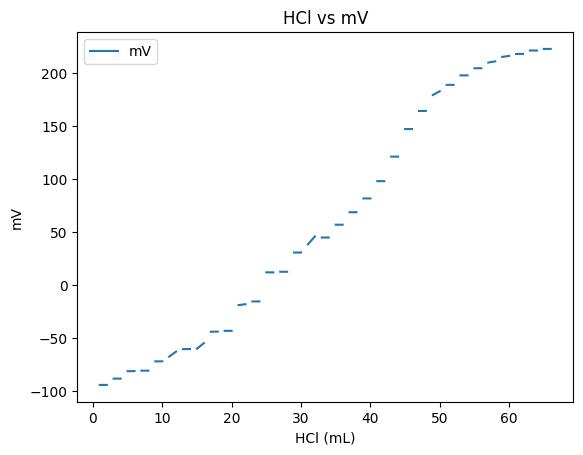

In [26]:

d.rename(columns={d.columns[0]: 'voltage', d.columns[1]: 'dose'}, inplace=True)
lastNonZero_index = d[d['voltage'] != 0].index[-1] #append d such that it only includes the last non zero value
d = d.iloc[:lastNonZero_index + 1]

d['voltage'] = d['voltage'] * 1000
d['mV'] = d['voltage'].shift(1).where(d['dose'] == 1)



d['hcl'] = d['dose'].cumsum()
d.plot(x='hcl', y='mV', kind='line')
plt.xlabel('HCl (mL)')
plt.ylabel('mV')
plt.title('HCl vs mV')
plt.show()

In [27]:
acid = 0 #initialize 

d['mV'] = d['voltage'].shift(-4).where(d['dose'] == 1)
# d['mV'] = d['voltage'].shift(1)  # Shift voltage by one row
d.loc[d['dose'] != 1, 'mV'] = None  # Keep only rows where dose == 1
acid += 0.05 if d['dose'].iloc[-1] == 1 else 0
d['hcl'] = d['dose'].cumsum() * 0.05



In [28]:
d1 = d.dropna(subset=["mV"])
d1 = d1[['hcl','mV']]
print(d1)

d['hcl'] = d['dose'].cumsum() * 0.05
d1 = d1.drop(columns=['voltage', 'dose'])
print(d1)


      hcl      mV
7    0.05  -89.20
8    0.10  -88.86
19   0.15  -88.47
20   0.20  -88.48
31   0.25  -81.10
..    ...     ...
442  3.10  220.05
460  3.15  221.67
461  3.20  221.67
476  3.25  224.55
477  3.30  224.54

[66 rows x 2 columns]


KeyError: "['voltage', 'dose'] not found in axis"

       mV   hcl
0     NaN  0.00
1     NaN  0.00
2     NaN  0.00
3     NaN  0.00
4     NaN  0.00
5   60.44  0.05
6   62.88  0.10
7     NaN  0.10
8     NaN  0.10
9     NaN  0.10
10    NaN  0.10
11    NaN  0.10
12    NaN  0.10
13    NaN  0.10
14    NaN  0.10
15    NaN  0.10
16    NaN  0.10
17    NaN  0.10
18  65.43  0.15
19  68.02  0.20
20    NaN  0.20
21    NaN  0.20
22    NaN  0.20
23    NaN  0.20
24    NaN  0.20
25    NaN  0.20
26    NaN  0.20
27    NaN  0.20
28    NaN  0.20


In [30]:
d['new_col'] = 0  # Initialize the new column with 0

for i in range(0, len(d), 10):
    chunk = d.iloc[i:i+10]
    if (chunk['voltage'].diff().abs() <= 0.05).all():
        d.loc[i:i+9, 'new_col'] = 1

print(d)






     voltage  dose  mV  hcl  new_col
0     -94.41   0.0 NaN  0.0        0
1     -94.41   0.0 NaN  0.0        0
2     -94.41   0.0 NaN  0.0        0
3     -94.41   0.0 NaN  0.0        0
4     -94.42   0.0 NaN  0.0        0
..       ...   ...  ..  ...      ...
482   224.53   0.0 NaN  3.3        0
483   224.54   0.0 NaN  3.3        0
484   224.55   0.0 NaN  3.3        0
485   224.55   0.0 NaN  3.3        0
486   224.56   0.0 NaN  3.3        0

[487 rows x 5 columns]


In [66]:
def delta(data):
    if len(data) < 10:
        return 0
    
    last10 = data[-10:]
    thresholdMet = []
    
    for i in range(len(last10)):
        if i ==0:
            continue
        else:
            diff = last10[i] - last10[i-1]
            thresholdMet.append(abs(diff)<=0.00005)
    if all(thresholdMet):
        return 1
    else:
        return 0 
    

data = -0.01536,
-0.01533,
-0.0153,
-0.01528,
-0.01525,
-0.00103,
0.01146,
0.012,
0.01191,
0.01194

print(delta(data))

0


In [62]:
import pandas as pd


d = pd.read_csv("/Users/cameronrichardson/Desktop/20250129_testLabviewExport.csv")
# d is already defined in previous cells, no need to redefine it

def check_batches(df):
    # Load data
    data = df.iloc[:, 0].values
    
    # Process in batches of 10
    for i in range(0, len(data) - 9):
        batch = data[i:i+10]
        if max(batch) - min(batch) > 0.05:
            print(0)
        else:
            print(1)

# Example usage
check_batches(d)


d


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1


,-0.09440,0.00000
0,-0.09441,0.0
1,-0.09441,0.0
2,-0.09441,0.0
3,-0.09441,0.0
4,-0.09442,0.0
...,...,...
5482,0.00000,0.0
5483,0.00000,0.0
5484,0.00000,0.0
5485,0.00000,0.0
